In [ ]:
!pip install tensorflow==2.12.0
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to

In [ ]:
# Import libraries
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


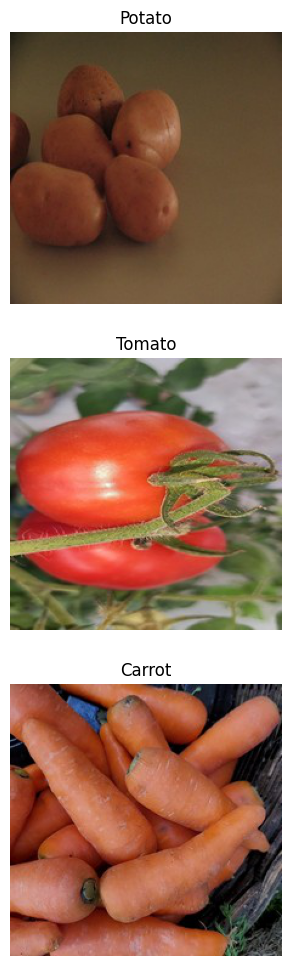

In [ ]:
# Let's plot a few images
train_path = "/content/drive/MyDrive/tomato_train"
validation_path = "/content/drive/MyDrive/tomato_validation"
test_path = "/content/drive/MyDrive/tomato_test"

image_categories = os.listdir('/content/drive/MyDrive/tomato_train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(3, 1, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Carrot', 1: 'Potato', 2: 'Tomato'}


In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 3000//6, 
                 validation_steps = 300//6, 
                 callbacks=early_stopping)

Epoch 1/100
500/500 [==============================] - 743s 1s/step - loss: 0.5290 - accuracy: 0.7860 - val_loss: 0.1777 - val_accuracy: 0.9300
Epoch 2/100
500/500 [==============================] - 306s 612ms/step - loss: 0.1516 - accuracy: 0.9453 - val_loss: 0.1451 - val_accuracy: 0.9833
Epoch 3/100
500/500 [==============================] - 267s 534ms/step - loss: 0.1580 - accuracy: 0.9450 - val_loss: 0.0865 - val_accuracy: 0.9767
Epoch 4/100
500/500 [==============================] - 242s 484ms/step - loss: 0.1186 - accuracy: 0.9583 - val_loss: 0.0470 - val_accuracy: 0.9867
Epoch 5/100
500/500 [==============================] - 237s 473ms/step - loss: 0.0816 - accuracy: 0.9803 - val_loss: 0.0396 - val_accuracy: 0.9967
Epoch 6/100
500/500 [==============================] - 234s 467ms/step - loss: 0.0807 - accuracy: 0.9763 - val_loss: 0.0093 - val_accuracy: 0.9933
Epoch 7/100
500/500 [==============================] - 231s 461ms/step - loss: 0.0527 - accuracy: 0.9867 - val_loss: 0.01

In [ ]:
model.evaluate(test_image_generator)

100/100 [==============================] - 155s 2s/step - loss: 0.0260 - accuracy: 0.9883


[0.026014419272542, 0.9883333444595337]

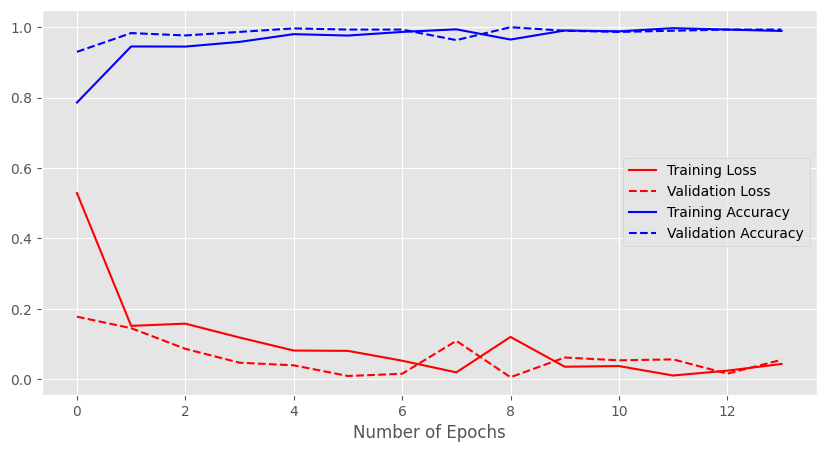

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 125ms/step


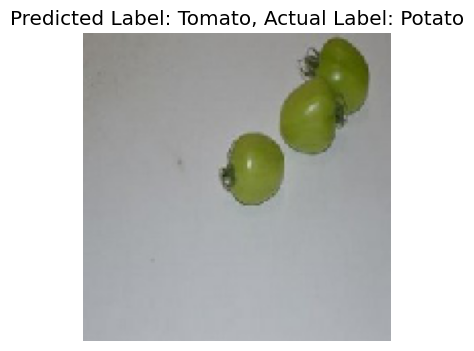

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/tomato_test/Tomato/1001.jpg'

def generate_predictions(test_image_path, actual_label, bool=0):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    if bool == 0:
      plt.figure(figsize=(4, 4))
      plt.imshow(test_img_arr)
      plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
      plt.grid()
      plt.axis('off')
      plt.show()

    if bool == 1:
      return predicted_vegetable

# call the function
generate_predictions(test_image_path, actual_label='Potato')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recipev1.csv')

for index, row in df.iterrows():
    if row['region'] == 'itaek':
        df.loc[index, 'region'] = 'Italian'


df.head

<bound method NDFrame.head of                                  name  \
0                asian orange chicken   
1                perfect pot stickers   
2                      pork dumplings   
3       super easy stir fried cabbage   
4                    kung pao chicken   
..                                ...   
451           ground turkey taco meat   
452             slow cooker taco soup   
453              seven layer taco dip   
454        ten minute enchilada sauce   
455  authentic mexican chili rellenos   

                                            ingredient   region  \
0    ['water', 'rice vinegar', 'lemon juice', 'soy ...  Chinese   
1    ['ground pork', 'minced garlic', 'finely chopp...  Chinese   
2    ['wonton wrappers', 'ground pork', 'minced fre...  Chinese   
3    ['vegetable oil', 'garlic, minced', 'shredded ...  Chinese   
4    ['cornstarch, dissolved in 2 tablespoons water...  Chinese   
..                                                 ...      ...   
451  ['c

In [ ]:
generate_predictions(test_image_path, actual_label='Potato', bool=1)

1/1 [==============================] - 0s 59ms/step


'Tomato'

In [ ]:
a = generate_predictions(test_image_path, actual_label='Potato', bool=1)

1/1 [==============================] - 0s 36ms/step


In [ ]:
for i in df:
  print(i)

name
ingredient
region
link


In [ ]:
for i in df['ingredient']:
  if 'apple' in i:
    print(i)

['pork butt, cut into 1 inch cubes', 'soy sauce', 'salt', 'white sugar', 'egg white', 'green onions, chopped', 'vegetable oil for frying', 'cornstarch', 'vegetable oil', 'celery, cut into 1/2 inch pieces', 'green bell pepper, cut into 1 inch pieces', 'medium onion, cut into wedges', 'white sugar, or to taste', 'salt to taste', 'water, divided', 'white sugar', 'apple cider vinegar', 'ketchup', 'soy sauce', 'salt', 'pineapple chunks, undrained', 'cornstarch']
['pork tenderloin, trimmed of silver skin', 'salt and ground black pepper', 'ketchup', 'seasoned rice vinegar', 'pineapple chunks, drained with juice reserved', 'brown sugar', 'garlic, minced', 'hot chili sauce (such as Sriracha®)', 'soy sauce', 'red pepper flakes', 'vegetable oil', 'butter', 'chopped green onion (white part only)', 'chopped green onion tops']
['unsalted butter', 'vegetable oil', 'boneless, skinless chicken thighs', 'kosher salt, or more to taste', 'curry powder', 'garam masala', 'ground cumin', 'freshly ground blac

In [ ]:
df['ingredient']

0      ['water', 'rice vinegar', 'lemon juice', 'soy ...
1      ['ground pork', 'minced garlic', 'finely chopp...
2      ['wonton wrappers', 'ground pork', 'minced fre...
3      ['vegetable oil', 'garlic, minced', 'shredded ...
4      ['cornstarch, dissolved in 2 tablespoons water...
                             ...                        
451    ['chili powder', 'ground cumin', 'ground papri...
452    ['ground beef', 'onion, chopped', 'chili beans...
453    ['refried beans', 'taco seasoning mix', 'sour ...
454    ['vegetable oil', 'New Mexico or California ch...
455    ['fresh Anaheim chile peppers', 'queso asadero...
Name: ingredient, Length: 456, dtype: object

In [ ]:
import tensorflow as tf

inception_net = tf.keras.applications.MobileNetV2()

In [ ]:
def classify_image(inp):

  # resize input image to match model's expected input shape
  inp = tf.image.resize(inp, [150, 150])

  test_img_arr = inp/255.0
  test_img_input = tf.reshape(test_img_arr, (1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  prediction = np.argmax(model.predict(test_img_input))
  predicted_vegetable = class_map[prediction]

  return predicted_vegetable


In [ ]:
import pandas as pd

In [ ]:
meat_types = [
    'ground',
    'chicken',
    'beef',
    'pork',
    'lamb',
    'sausage',
    'steak',
    'ham',
    'bratwurst',
    'bacon',
    'crab',
    'shrimp',
    'cod',
    'fish',
    'tuna',
    'chicken',
    'breast',
    'turkey',
    'chops',
    'lamb',
    'rib',
    'shoulder',
    'loin',
    'tenderloin',
    'veal',
    'salmon',
    'spareribs',
    'bone',
    'chuck',
    'short',
    'ribs',
    'flanken',
    'pork',
    'belly',
    'tenderloins',
    'chicken',
    'wings',
    'chicken',
    'thighs',
    'chicken',
    'legs',
    'duck',
    'quail',
    'game',
    'meat',
    'venison',
    'elk',
    'moose',
    'rabbit',
    'goat',
    'bison',
    'boar',
    'kangaroo',
    'ostrich',
    'emu',
    'horse',
    'snake',
    'turtle',
    'buffalo',
    'crocodile',
    'alligator',
    'frog',
    'escargot',
]

In [ ]:
import json

def parse_json(json_str):
    try:
        data = json.loads(json_str)
        name = data[0]
        region = data[1]
        ingredient = data[2]
        link = data[3]
        return name, region, ingredient, link
    except ValueError:
        return None

In [ ]:
def classify_image(inp, region, food_type, allergy):
  # resize input image to match model's expected input shape
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recipev1.csv')
  inp = tf.image.resize(inp, [150, 150])

  test_img_arr = inp/255.0
  test_img_input = tf.reshape(test_img_arr, (1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  prediction = np.argmax(model.predict(test_img_input))
  predicted_vegetable = class_map[prediction]
  
  df_new = pd.DataFrame()

  df['contains_meat'] = df['ingredient'].apply(lambda ingredient_list: any(meat in ingredient_list for meat in meat_types))

  if food_type == 'High Protein':
    df = df[(df['contains_meat'] == True)]
  elif food_type == 'Vegetarian':
    df = df[(df['contains_meat'] == False)]
  else:
    df = df

  if not allergy:
    for index, row in df.iterrows():
      if predicted_vegetable.lower() in row['ingredient']:
        if region in row['region']:
          temp_df = pd.DataFrame({
              'name': [row['name']],
              'region': [row['region']],
              'ingredient': [row['ingredient']],
              'link': [row['link']]
          })
          df_new = df_new.append(temp_df, ignore_index=True)
  else:
    for index, row in df.iterrows():
      if predicted_vegetable.lower() in row['ingredient']:
        if region in row['region']:
          if allergy not in row['ingredient']:
            temp_df = pd.DataFrame({
                'name': [row['name']],
                'region': [row['region']],
                'ingredient': [row['ingredient']],
                'link': [row['link']]
            })
            df_new = df_new.append(temp_df, ignore_index=True)

  json = df_new.to_json(orient='values')
  # html = df_new.to_html()

  print(allergy)
  json_data = df_new.to_json(orient='values')
  json_start1 = json_data.find('[[')
  json_end1 = json_data.find('],[', json_start1 + 1)
  json_start2 = json_data.find('],[', json_end1 + 1)
  json_end2 = json_data.find('],[', json_start2 + 1)
  json_start3 = json_data.find('],[', json_end2 + 1)
  json_end3 = json_data.find('],[', json_start3 + 1)  # Updated this line
    
  json1 = json_data[json_start1:json_end1 + 2] if json_start1 != -1 and json_end1 != -1 else "No data"
  json2 = json_data[json_start2:json_end2 + 2] if json_start2 != -1 and json_end2 != -1 else "No data"
  json3 = json_data[json_start3:json_end3] if json_start3 != -1 and json_end3 != -1 else "No data"  # Updated this line

  import re
  matches = re.findall(r'"([^"]+)"', json1)

  name = matches[0]
  region = matches[1]
  ingredients = re.sub(r"[\[\]'\"]", "", matches[2])
  link = re.sub(r"\\", "", matches[3])

  output = f"Name: {name}\n\nRegion: {region}\n\nIngredients: {ingredients}\n\nLink: {link}"

  matches2 = re.findall(r'"([^"]+)"', json2)

  name2 = matches2[0]
  region2 = matches2[1]
  ingredients2 = re.sub(r"[\[\]'\"]", "", matches2[2])
  link2 = re.sub(r"\\", "", matches2[3])

  output2 = f"Name: {name2}\n\nRegion: {region2}\n\nIngredients: {ingredients2}\n\nLink: {link2}"


  matches3 = re.findall(r'"([^"]+)"', json3)

  name3 = matches3[0]
  region3 = matches3[1]
  ingredients3 = re.sub(r"[\[\]'\"]", "", matches3[2])
  link3 = re.sub(r"\\", "", matches[3])

  output3 = f"Name: {name3}\n\nRegion: {region3}\n\nIngredients: {ingredients3}\n\nLink: {link3}"


  return output, output2, output3
  




In [ ]:
gr.Interface(
    fn=classify_image, 
    inputs=[gr.inputs.Image(), 
            gr.inputs.Dropdown(df['region'].unique().tolist()), 
            gr.inputs.Dropdown(['High Protein', 'Vegetarian', 'Normal']),
            'text',
    ],
    outputs=[gr.outputs.Textbox(label="Recipe 1"), gr.outputs.Textbox(label="Recipe 2"), gr.outputs.Textbox(label="Recipe 3")],  # Separate Textbox outputs
    examples=[["/content/drive/MyDrive/tomato_test/Tomato/1152.jpg"], ["/content/drive/MyDrive/tomato_test/Potato/1001.jpg"]]
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8d3628b912b16a5f73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
